In this notebook, data cleaning of the dataset will be done.

In [1]:
# Let's import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


Firstly, of couse we should diagnose if we need cleaning.

In [2]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv')
data.head()  # see first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail() # see last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.columns # see variables

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# shape gives number of rows and columns in a tuble
data.shape

(150, 6)

In [6]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Let's go deeper about our dataset. lets look frequency of iris species

In [7]:
print(data['Species'].value_counts(dropna =False))  # if there are nan values that also be counted

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


Every species has 50 observation

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Let's plot to see if we have outliers. outlier is the value that is considerably higher or lower from rest of the data
* Box plots: visualize basic statistics like outliers, min/max or quantiles

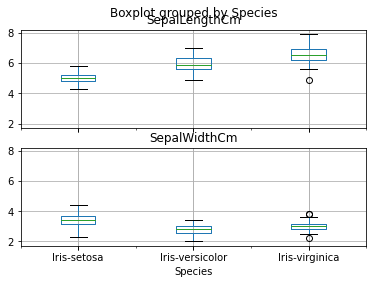

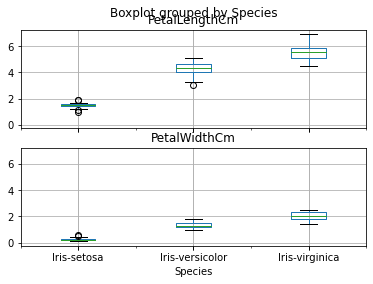

In [9]:
data.boxplot(column=['SepalLengthCm', 'SepalWidthCm'],by = 'Species',layout=(2, 1), fontsize=10)
data.boxplot(column=['PetalLengthCm','PetalWidthCm'],by = 'Species',layout=(2, 1), fontsize=10)
plt.show()

**TIDY DATA**
We will use melt() method.

In [10]:
data_head = data.head()
data_head

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data_tail= data.tail()
data_tail

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
# let's melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted1 = pd.melt(frame=data_head,id_vars = 'Species', value_vars= ['SepalWidthCm','PetalWidthCm'])
melted1

,Species,variable,value
0,Iris-setosa,SepalWidthCm,3.5
1,Iris-setosa,SepalWidthCm,3.0
2,Iris-setosa,SepalWidthCm,3.2
3,Iris-setosa,SepalWidthCm,3.1
4,Iris-setosa,SepalWidthCm,3.6
5,Iris-setosa,PetalWidthCm,0.2
6,Iris-setosa,PetalWidthCm,0.2
7,Iris-setosa,PetalWidthCm,0.2
8,Iris-setosa,PetalWidthCm,0.2
9,Iris-setosa,PetalWidthCm,0.2


In [13]:
melted2 = pd.melt(frame=data_tail,id_vars = 'Species', value_vars= ['SepalWidthCm','PetalWidthCm'])
melted2

,Species,variable,value
0,Iris-virginica,SepalWidthCm,3.0
1,Iris-virginica,SepalWidthCm,2.5
2,Iris-virginica,SepalWidthCm,3.0
3,Iris-virginica,SepalWidthCm,3.4
4,Iris-virginica,SepalWidthCm,3.0
5,Iris-virginica,PetalWidthCm,2.3
6,Iris-virginica,PetalWidthCm,1.9
7,Iris-virginica,PetalWidthCm,2.0
8,Iris-virginica,PetalWidthCm,2.3
9,Iris-virginica,PetalWidthCm,1.8


**CONCATENATING DATA**

In [14]:
# lets concatenate 2 melted dataframe
conc_data_row = pd.concat([melted1,melted2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,Species,variable,value
0,Iris-setosa,SepalWidthCm,3.5
1,Iris-setosa,SepalWidthCm,3.0
2,Iris-setosa,SepalWidthCm,3.2
3,Iris-setosa,SepalWidthCm,3.1
4,Iris-setosa,SepalWidthCm,3.6
5,Iris-setosa,PetalWidthCm,0.2
6,Iris-setosa,PetalWidthCm,0.2
7,Iris-setosa,PetalWidthCm,0.2
8,Iris-setosa,PetalWidthCm,0.2
9,Iris-setosa,PetalWidthCm,0.2


In [15]:
data1 = data['Id'].head()
data2= data['Species'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa


Let's check data types.

In [16]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [17]:
# lets convert object(str) to categorical and float to int.
data['SepalLengthCm'] = data['SepalLengthCm'].astype('int')
data['Species'] = data['Species'].astype('category')
data.dtypes

Id                  int64
SepalLengthCm       int64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [18]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5,3.5,1.4,0.2,Iris-setosa
1,2,4,3.0,1.4,0.2,Iris-setosa
2,3,4,3.2,1.3,0.2,Iris-setosa
3,4,4,3.1,1.5,0.2,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa


We can see SepalLengthCm is integer from now on.

**Let's check if we have missing data**

What to do if we have?
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    int64   
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(3), int64(2)
memory usage: 6.2 KB


As we see here we do not have any missing value. So we don't need to do anything.